<a href="https://colab.research.google.com/github/GeetikaManne315/CSCI-E-83/blob/master/Recurrent_Neural_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print('Number of training samples:', len(y_train))
print('Number of positive samples', sum(y_train))
print('Number of test samples:', len(y_test))


Number of training samples: 25000
Number of positive samples 12500
Number of test samples: 25000


In [4]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}
print([index_word.get(i, ' ') for i in X_train[0]])

1641221/1641221 [==============================] - 0s 0us/step
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', '

In [6]:
review_lengths = [len(x) for x in X_train]

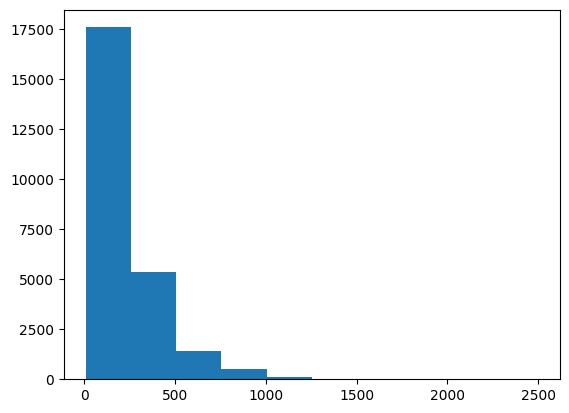

In [7]:
plt.hist(review_lengths, bins=10)
plt.show()

In [8]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [22]:
print('X_train shape after padding:', X_train.shape)
print('X_test shape after padding:', X_test.shape)
print(y_train.shape)

X_train shape after padding: (25000, 200)
X_test shape after padding: (25000, 200)
(25000,)


In [10]:
tf.random.set_seed(42)
model = models.Sequential()

In [11]:
embedding_size = 32
model.add(layers.Embedding(vocab_size, embedding_size))

In [12]:
model.add(layers.LSTM(50))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 176651 (690.04 KB)
Trainable params: 176651 (690.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
model.compile(loss= 'binary_crossentropy', optimizer='adam',
            metrics=['accuracy'])

In [14]:
batch_size = 64
n_epoch = 3
model.fit(X_train, y_train,
batch_size=batch_size,
epochs=n_epoch,
validation_data=(X_test, y_test))

Epoch 1/3
391/391 [==============================] - 48s 114ms/step - loss: 0.4637 - accuracy: 0.7676 - val_loss: 0.3428 - val_accuracy: 0.8526
Epoch 2/3
391/391 [==============================] - 13s 32ms/step - loss: 0.2681 - accuracy: 0.8920 - val_loss: 0.3040 - val_accuracy: 0.8702
Epoch 3/3
391/391 [==============================] - 7s 19ms/step - loss: 0.2206 - accuracy: 0.9119 - val_loss: 0.3062 - val_accuracy: 0.8704


In [15]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy:', acc)

Test accuracy: 0.8704000115394592


In [16]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_size))
model.add(layers.LSTM(50, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(50, dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          16600     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 196851 (768.95 KB)
Trainable params: 196851 (768.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
optimizer = optimizers.Adam(learning_rate=0.003)
model.compile(loss='binary_crossentropy', optimizer=optimizer,
metrics=['accuracy'])

In [19]:
n_epoch = 7
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch,
validation_data=(X_test, y_test))

Epoch 1/7
391/391 [==============================] - 38s 84ms/step - loss: 0.5556 - accuracy: 0.7120 - val_loss: 0.5029 - val_accuracy: 0.7682
Epoch 2/7
391/391 [==============================] - 21s 54ms/step - loss: 0.3578 - accuracy: 0.8501 - val_loss: 0.3481 - val_accuracy: 0.8532
Epoch 3/7
391/391 [==============================] - 13s 32ms/step - loss: 0.4030 - accuracy: 0.8157 - val_loss: 0.3807 - val_accuracy: 0.8372
Epoch 4/7
391/391 [==============================] - 12s 30ms/step - loss: 0.2672 - accuracy: 0.8950 - val_loss: 0.3183 - val_accuracy: 0.8675
Epoch 5/7
391/391 [==============================] - 10s 25ms/step - loss: 0.2178 - accuracy: 0.9180 - val_loss: 0.3072 - val_accuracy: 0.8761
Epoch 6/7
391/391 [==============================] - 10s 25ms/step - loss: 0.1916 - accuracy: 0.9284 - val_loss: 0.3037 - val_accuracy: 0.8786
Epoch 7/7
391/391 [==============================] - 10s 27ms/step - loss: 0.1625 - accuracy: 0.9408 - val_loss: 0.3205 - val_accuracy: 0.8733

In [20]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy with stacked LSTM:', acc)

Test accuracy with stacked LSTM: 0.8732799887657166


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 1 instead of 5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 1 instead of 5.
  warnings.warn(


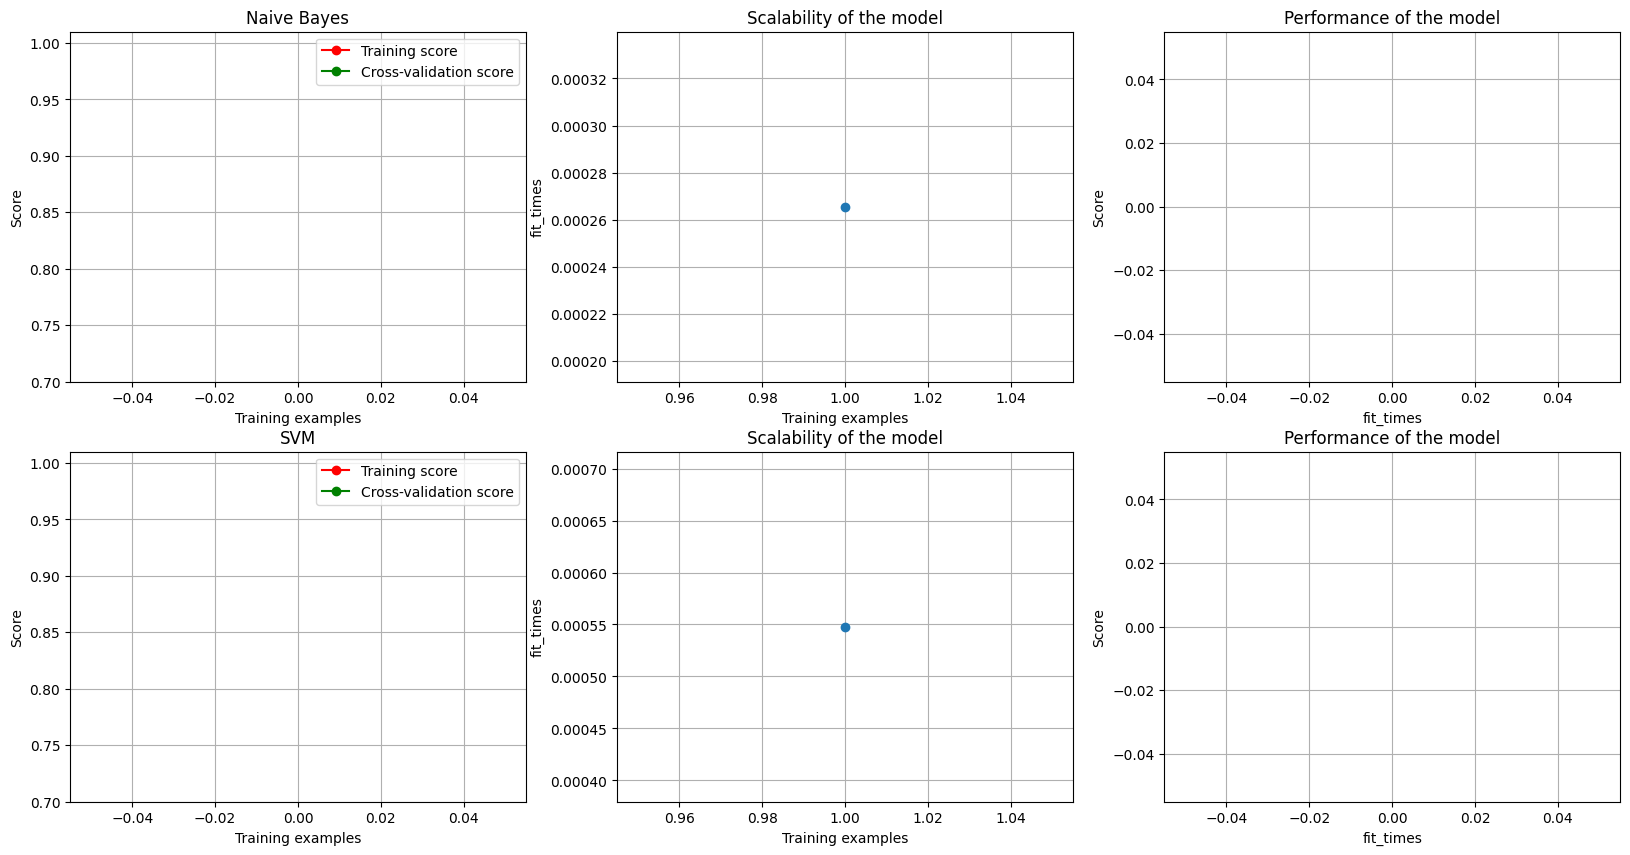

In [24]:


# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


# Define the estimators
estimators = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', gamma=0.01, random_state=0)
}

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot learning curve for Naive Bayes
plot_learning_curve(estimators['Naive Bayes'], 'Naive Bayes', X, y, axes=axes[0], ylim=(0.7, 1.01), cv=cv, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))

# Plot learning curve for SVM
plot_learning_curve(estimators['SVM'], 'SVM', X, y, axes=axes[1], ylim=(0.7, 1.01), cv=cv, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))

# Show the plot
plt.show()
